# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we visualize four activation maps in a CNN layer.


### 1. Import the Image

(853, 1280, 3)
(853, 1280)
(255, 384)


c:\users\zhangwenqi\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


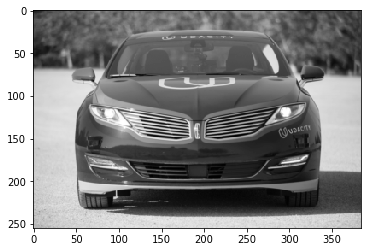

In [23]:
import cv2# opencv库
import scipy.misc
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# TODO: Feel free to try out your own images here by changing img_path
# to a file path to another image on your computer!
img_path ="C:/Users/zhangwenqi/Desktop/udacity_sdc.png"#中文目录会读不出来

# load color image 
bgr_img = cv2.imread(img_path)
print(np.shape(bgr_img)) #(853, 1280, 3) 像素是1208*853个，rgb图 所以是三维
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img,cv2.COLOR_BGR2GRAY)
print(np.shape(gray_img)) #(853, 1280, 3) 像素是1208*853个，灰度图
# resize to smaller
small_img = scipy.misc.imresize(gray_img, 0.3)
print(np.shape(small_img)) #(255,384） 缩小为30%
# rescale entries to lie in [0,1] 
small_img = small_img.astype("float32")/255 

plt.imshow(small_img, cmap='gray')
plt.show()

In [21]:
small_img

array([[0.13333334, 0.13725491, 0.1254902 , ..., 0.24313726, 0.2509804 ,
        0.2901961 ],
       [0.15294118, 0.14117648, 0.13333334, ..., 0.23921569, 0.25490198,
        0.28627452],
       [0.1764706 , 0.16470589, 0.15686275, ..., 0.23921569, 0.25882354,
        0.27450982],
       ...,
       [0.7254902 , 0.7372549 , 0.70980394, ..., 0.7764706 , 0.75686276,
        0.7529412 ],
       [0.7411765 , 0.74509805, 0.7137255 , ..., 0.7647059 , 0.7647059 ,
        0.7411765 ],
       [0.7137255 , 0.73333335, 0.7058824 , ..., 0.7176471 , 0.7019608 ,
        0.68235296]], dtype=float32)

### 2. Specify the Filters

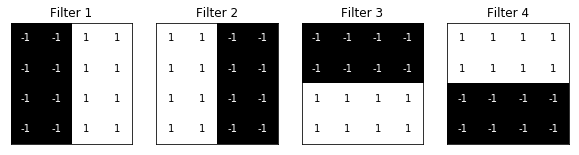

In [25]:
import numpy as np

# TODO: Feel free to modify the numbers here, to try out another filter!
# Please don't change the size of the array ~ :D
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

### do not modify the code below this line ###

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = [filter_1, filter_2, filter_3, filter_4]

# visualize all filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

### 3. Visualize the Activation Maps for Each Filter

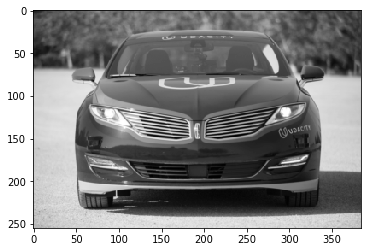

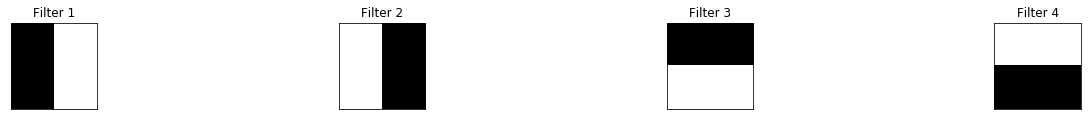

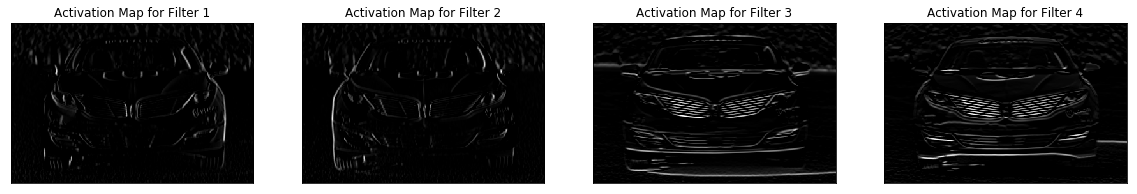

In [31]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
import matplotlib.cm as cm

# plot image
plt.imshow(small_img, cmap='gray')

# define a neural network with a single convolutional layer with one filter
model = Sequential()
model.add(Convolution2D(1, (4, 4), activation='relu', input_shape=(small_img.shape[0], small_img.shape[1], 1)))#input_shape为高度、宽度、深度

# apply convolutional filter and return output
def apply_filter(img, index, filter_list, ax):
    # set the weights of the filter in the convolutional layer to filter_list[i]
    model.layers[0].set_weights([np.reshape(filter_list[index], (4,4,1,1)), np.array([0])])
    # plot the corresponding activation map
    ax.imshow(np.squeeze(model.predict(np.reshape(img, (1, img.shape[0], img.shape[1], 1)))), cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):#画四个滤波器图
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

# visualize all activation maps
fig = plt.figure(figsize=(20, 20))#画四张经过滤波器后输出图
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    apply_filter(small_img, i, filters, ax)
    ax.set_title('Activation Map for Filter %s' % str(i+1))

In [32]:
from keras.layers import Conv2D
Conv2D(filters=16, kernel_size=2, strides=2, activation='relu', input_shape=(200, 200, 1))


# 添加卷积层

In [52]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, strides=2, padding='valid', 
    activation='relu', input_shape=(200, 200, 3)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 100, 100, 16)      208       
Total params: 208
Trainable params: 208
Non-trainable params: 0
_________________________________________________________________


## 添加池化层

In [53]:
from keras.layers import MaxPooling2D
model.add(MaxPooling2D(pool_size=4, strides=4, input_shape=(100, 100, 15)))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 100, 100, 16)      208       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 25, 25, 16)        0         
Total params: 208
Trainable params: 208
Non-trainable params: 0
_________________________________________________________________


In [56]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
__________